In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt

# Import the linear regression module from the scikit-learn library.
from sklearn.linear_model import LinearRegression

In [2]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
seed = 1234
np.random.seed(seed)

In [3]:
# Generate input/ouput (features/labels) values.
N = 100 # Number of observations (pairs of features and labels).

# Attribute.
x = np.linspace(0, 2, N).reshape(N, 1)

# True function.
y = 4.0 + 3.0*x 

# Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

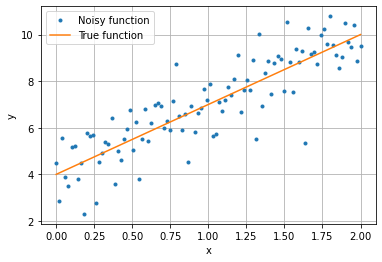

In [4]:
# Plot pair example/label.
fig = plt.figure()
plt.plot(x, y_noisy, '.', label='Noisy function')
plt.plot(x, y, label='True function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

## Normal equation

Considered hypothesis function: 

$$\hat{y} = h(x) = \hat{a}_0 + \hat{a}_1x = \textbf{X} \hat{\textbf{a}} $$

In [5]:
# Concatenate the two attributes, x0 and x1.
X = np.c_[np.ones((N, 1)), x] # add x0 = 1 to each instance

# Solve by applying the least-Squares method.
# We use the inv() function from NumPy’s Linear 
# Algebra module (np.linalg) to compute the inverse of a matrix.
# We use dot() method for matrix multiplication.
a_optimum = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_noisy)

# Print best solution.
print('a0: %1.4f' % (a_optimum[0][0]))
print('a1: %1.4f' % (a_optimum[1][0]))

a0: 4.0696
a1: 2.9656


#### Calculating the MSE

In [6]:
# Hypothesis function. 
yhat = X.dot(a_optimum)

# MSE equation.
Je_optimum = (1.0/N)*np.sum(np.power((y_noisy - yhat), 2))
print('MSE: %1.4f' % (Je_optimum))

MSE: 0.9910


## Scikit-learn's solution

The equivalent solution using the Scikit-Learn library is given below.

In [7]:
# Instantiate the LinearRegression class.
lin_reg = LinearRegression()

# Train the model.
lin_reg.fit(x, y_noisy)

print('a0: %1.4f' % (lin_reg.intercept_[0])) # Value that crosses the y-axis when all features are equal to 0.
print('a1: %1.4f' % (lin_reg.coef_[0][0])) # parameters associated with the features.

# Create column vector.
a_sklearn = np.zeros((2, 1))
a_sklearn[0][0] = lin_reg.intercept_[0]
a_sklearn[1][0] = lin_reg.coef_[0][0]

a0: 4.0696
a1: 2.9656


#### Observações

+ Percebam que o argumento $x$ passado para o método `fit` da classe `LinearRegression` é uma matriz com N x K.
+ Porém, lembrem-se que neste exemplo temos peso $a_0$ e, portanto, $x$ deveria ter dimensão $N \times K+1$. 
+ Entretanto, **por padrão**, a classe `LinearRegression` já faz isso automaticamente. 
+ Caso sua função hipótese não considere o peso $a_0$, então, durante a instanciação da classe vocês devem configurar o parâmetro `fit_intercept=False`.
+ Documentação da classe:
    + https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

#### Calculating the MSE

In [8]:
# Hypothesis function. 
yhat = X.dot(a_sklearn)

# MSE equation.
Je_sklearn = (1.0/N)*np.sum(np.power((y_noisy - yhat), 2))
print('MSE: %1.4f' % (Je_sklearn))

MSE: 0.9910


## Comparing the results

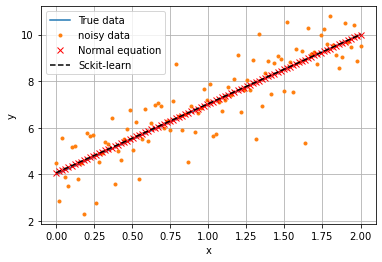

In [9]:
# Plot pair example/label.
fig = plt.figure()
plt.plot(x, y, label='True data')
plt.plot(x, y_noisy, '.', label='noisy data')
plt.plot(x, X.dot(a_optimum), 'rx', label='Normal equation')
plt.plot(x, X.dot(a_sklearn), 'k--', label='Sckit-learn')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#### Observações

+ Com apenas 100 amostras, os valores obtidos são próximos dos exatos, porém, o ruído limita a aproximação.
+ Se aumentarmos o número de exemplos, conseguimos melhorar a aproximação $N \to \infty \therefore \hat{a}_0 \to a_0$ e $\hat{a}_1 \to a_1$.